In [ ]:
import os

In [ ]:
os.getcwd()

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('WHS6_102.csv', sep=',"')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
list(data.columns)

In [3]:
data['"Country'] = data['"Country'].str.strip('"')

In [ ]:
data.head()

In [4]:
for col in list(data.columns):
    data[col] = data[col].str.strip('"')

In [ ]:
data.head()

In [5]:
data.columns = [i.strip('"') for i in list(data.columns)]

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.loc[data['Year']=='2014',:]

In [ ]:
data.loc[data.Country=='Iran',:]

In [ ]:
data[data.Year < '2013']

In [ ]:
data2 = data.copy()

In [ ]:
data2.set_index('Year')

In [ ]:
data.dtypes

In [6]:
data['Year'] = data.Year.astype(int)

In [ ]:
data.dtypes

In [7]:
data['Hospital beds (per 10 000 population)'] = data['Hospital beds (per 10 000 population)'].astype(int)

In [ ]:
data.dtypes

In [ ]:
data.Country[data.Country=='Afghanistan']

In [ ]:
data.loc[(data.Country.str.contains('Iran')|data.Country.str.contains('Turkmen')) & (data.Year == 2013)]

In [ ]:
data.axes

In [ ]:
gk = data.groupby(['Year']).max()

In [ ]:
gk.groups.max()

In [ ]:
data.groupby(['Year']).max()

In [ ]:
data.groupby(['Country']).max()['Hospital beds (per 10 000 population)']

In [ ]:
data.groupby(['Year']).max()['Hospital beds (per 10 000 population)']

In [ ]:
data.groupby(['Country']).max()['Hospital beds (per 10 000 population)']

In [ ]:
data[data.Country == 'Afghanistan']

In [ ]:
data3 = data.copy()

In [ ]:
data3.set_index('Country', inplace=True)
data3.head()

In [ ]:
data3.groupby(['Year']).max()

In [ ]:
data[data.Country == 'Albania']

In [ ]:
data['Year'] = data.Year.astype(str)

In [ ]:
data.groupby(['Country']).Year.max()

In [ ]:
data.dtypes

In [ ]:
data.groupby(['Country'])[['Hospital beds (per 10 000 population)']].max().shape

In [ ]:
data.groupby(['Year', 'Country'])[['Hospital beds (per 10 000 population)']].max()

In [ ]:
dt = data.groupby(['Year', 'Country'])[['Hospital beds (per 10 000 population)']].max()

In [ ]:
dt.dtypes

In [ ]:
dt.index.shape

In [ ]:
for name in dt:
    print(name)

In [ ]:
data.groupby(['Year'])[['Hospital beds (per 10 000 population)']].max()

In [8]:
mx = data.groupby(['Country'])[['Hospital beds (per 10 000 population)']].transform(max) 

In [ ]:
len(mx)

In [ ]:
data.shape

In [ ]:
data['Max'] = mx

In [9]:
mn = data.groupby(['Country'])[['Hospital beds (per 10 000 population)']].transform(min)

data['Min'] = mn

In [10]:
ym = data.groupby(['Year'])[['Hospital beds (per 10 000 population)']].transform(max)
data['Year_Max'] = ym

In [ ]:
data

In [ ]:
data.loc[data['Hospital beds (per 10 000 population)'] == data.Max,:]

In [ ]:
data[data['Hospital beds (per 10 000 population)'] == data.Max].head(20)

In [ ]:
data.head(10)

In [ ]:
data2.head(20)

In [ ]:
data[(data['Hospital beds (per 10 000 population)'] == data.Max) & (data.Country.str.contains('Iran'))].head(20)

In [ ]:
cond = (data['Hospital beds (per 10 000 population)'] == data.Max) | (data['Hospital beds (per 10 000 population)'] == data.Min)
data[cond].head(20)

In [ ]:
data[cond & (data.Country.str.contains('Iran'))]

In [ ]:
data['Year'] = data.Year.astype(int)

In [11]:
data['Per_Year'] = data.Year + 579

In [ ]:
data

In [ ]:
data[cond & (data.Country.str.contains('Iran'))]

In [ ]:
data[data.Country.str.contains('Iran')].drop(['Max', 'Min'], axis=1).sort_values('Year')

In [ ]:
data['Formal_Year'] = data.Year - 621

In [ ]:
data[cond & (data.Country.str.contains('Iran'))].head(20)

In [ ]:
data['Country'] = data.Country.str.replace(' (Islamic Republic of)', '')

In [ ]:
data[cond & (data.Country.str.contains('Iran'))].head(20)

In [ ]:
ir = data[cond & (data.Country.str.contains('Iran'))]

In [ ]:
ir

In [ ]:
data[data.Country == 'Iran']

In [12]:
data = data.replace(to_replace='Iran (Islamic Republic of)',
          value='Iran')

In [13]:
data[data.Country=='Iran']

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
497,Iran,2014,15,1,62,2593
498,Iran,2013,15,1,110,2592
499,Iran,2012,1,1,134,2591
500,Iran,2011,17,1,113,2590
501,Iran,2010,17,1,143,2589
502,Iran,2009,14,1,111,2588
503,Iran,2008,14,1,111,2587
504,Iran,2007,17,1,112,2586
505,Iran,2006,17,1,112,2585
506,Iran,2005,17,1,111,2584


In [ ]:
ir[['Country', 'Year', 'Formal_Year', 'Hospital beds (per 10 000 population)']]

In [ ]:
ir.replace(to_replace='Iran (Islamic Republic of)',
          value='Iran')

In [ ]:
ir['Country'].replace(to_replace='Iran (Islamic Republic of)',
          value='Iran')

In [ ]:
ir_rep = ir.replace(to_replace='Iran (Islamic Republic of)',
          value='Iran')

In [ ]:
ir_rep

In [ ]:
cn = data.groupby('Country')

In [ ]:
pd.show_versions()

In [ ]:
data.info(memory_usage='deep')

In [ ]:
dtypes = {'Year': 'category',
         'Country': 'category',
         'Per_Year': 'category',
         'Formal_Year': 'category'}

data = data.astype(dtypes)

In [ ]:
data.dtypes

In [ ]:
data.info(memory_usage='deep')

In [ ]:
data.Country.drop_duplicates()

In [ ]:
data.Country.clip_upper()

In [ ]:
data.Country.transpose()

In [ ]:
data

In [ ]:
data.groupby('Year')['Hospital beds (per 10 000 population)'].describe().stack().unstack()

In [ ]:
!pip list

In [ ]:
%lsmagic

In [ ]:
%pwd

In [ ]:
%ddir

In [ ]:
%load_ext

In [ ]:
%conda env list

In [ ]:
data.Country[2]

In [ ]:
people = {
    "first": ["Corey", 'Jane', 'John'], 
    "last": ["Schafer", 'Doe', 'Doe'], 
    "email": ["CoreyMSchafer@gmail.com", 'JaneDoe@email.com', 'JohnDoe@email.com']
}

In [ ]:
data.Country.value_counts().plot

In [ ]:
%matplotlib inline

In [ ]:
data.Year.value_counts().sort_index().plot(kind='density')

In [ ]:
data

In [ ]:
data.head(30)

In [ ]:
data.columns

In [ ]:
data.Year.unique()

In [14]:
year = data.Year.unique().tolist()

In [15]:
year

[2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000]

In [16]:
country = data.Country.unique().tolist()

In [ ]:
country

In [18]:
import numpy as np
data3 = data.copy()

cl = data3.columns.tolist()
temp_dtf = pd.DataFrame(columns = cl)
# temp_dtf.columns = cl

for cnt in country:
    cnt_year = data3[data3.Country == cnt].Year.unique().tolist()
    missing_years = [y for y in year if y not in cnt_year]
    
    for y in missing_years:
        
        d = {i: [np.nan] for i in cl}
        d['Country'] = cnt
        d['Year'] = y
        temp = pd.DataFrame(d)
#         print(temp)
        temp_dtf = pd.concat([temp_dtf, temp])

In [19]:
temp_dtf

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Albania,2015,NaN,NaN,NaN,NaN
0,Albania,2014,NaN,NaN,NaN,NaN
0,Albania,2008,NaN,NaN,NaN,NaN
0,Algeria,2014,NaN,NaN,NaN,NaN
0,Algeria,2013,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
0,Zimbabwe,2004,NaN,NaN,NaN,NaN
0,Zimbabwe,2003,NaN,NaN,NaN,NaN
0,Zimbabwe,2002,NaN,NaN,NaN,NaN
0,Zimbabwe,2001,NaN,NaN,NaN,NaN


In [20]:
data.shape

(1275, 6)

In [21]:
data[data.Country == 'Albania']

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
16,Albania,2013,29,26,110,2592
17,Albania,2012,29,26,134,2591
18,Albania,2011,26,26,113,2590
19,Albania,2010,30,26,143,2589
20,Albania,2009,30,26,111,2588
21,Albania,2007,31,26,112,2586
22,Albania,2006,31,26,112,2585
23,Albania,2005,31,26,111,2584
24,Albania,2004,30,26,107,2583
25,Albania,2003,31,26,113,2582


In [22]:
temp_dtf[temp_dtf.Country == 'Albania']

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Albania,2015,NaN,NaN,NaN,NaN
0,Albania,2014,NaN,NaN,NaN,NaN
0,Albania,2008,NaN,NaN,NaN,NaN


In [23]:
temp_dtf.shape

(1621, 6)

In [25]:
len(country) * len(year)

2896

In [26]:
data3 = pd.concat([data3, temp_dtf])

In [27]:
data3.tail()

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Zimbabwe,2004,NaN,NaN,NaN,NaN
0,Zimbabwe,2003,NaN,NaN,NaN,NaN
0,Zimbabwe,2002,NaN,NaN,NaN,NaN
0,Zimbabwe,2001,NaN,NaN,NaN,NaN
0,Zimbabwe,2000,NaN,NaN,NaN,NaN


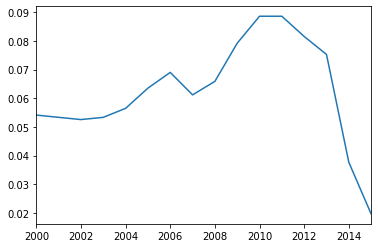

In [35]:
data.Year.value_counts(normalize=True).sort_index().plot()

In [42]:
import numpy as np
data4 = data.copy()

cl = data4.columns.tolist()
# temp_dtf2 = pd.DataFrame(columns = cl)
# temp_dtf.columns = cl

rw = data4.shape[0]

for cnt in country:
    cnt_year = data3[data4.Country == cnt].Year.unique().tolist()
    missing_years = [y for y in year if y not in cnt_year]
    
    for y in missing_years:
        data4.loc[rw, ['Country', 'Year']] = [cnt, y]
        rw += 1
        
        
#         d = {i: [np.nan] for i in cl}
#         d['Country'] = cnt
#         d['Year'] = y
#         temp = pd.DataFrame(d)
#         print(temp)
#         temp_dtf = pd.concat([temp_dtf, temp])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [43]:
data4.shape

(2896, 6)

In [45]:
data4.shape[0] - data.shape[0]

1621

In [47]:
data4.iloc[data.shape[0]]

Country                                  Albania
Year                                        2015
Hospital beds (per 10 000 population)        NaN
Min                                          NaN
Year_Max                                     NaN
Per_Year                                     NaN
Name: 1275, dtype: object

In [37]:
temp_dtf2

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year


In [38]:
data4.shape

(1275, 6)

In [40]:
data4.iloc[data.shape[0] - 1]

Country                                  Zimbabwe
Year                                         2006
Hospital beds (per 10 000 population)          30
Min                                            17
Year_Max                                      112
Per_Year                                     2585
Name: 1274, dtype: object

In [51]:
data.loc[::10, :]

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Afghanistan,2015,5,3,115,2594
10,Afghanistan,2005,4,3,111,2584
20,Albania,2009,30,26,111,2588
30,Algeria,2004,17,17,107,2583
40,Argentina,2010,45,41,143,2589
...,...,...,...,...,...,...
1230,United States of America,2010,30,29,143,2589
1240,Uzbekistan,2009,46,40,111,2588
1250,Venezuela (Bolivarian Republic of),2014,8,8,62,2593
1260,Yemen,2010,7,6,143,2589


In [52]:
data.sample(n=10)

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
675,Libya,2007,37,34,112,2586
1058,Sweden,2009,28,26,111,2588
1017,Somalia,2003,4,4,113,2582
144,Belize,2014,13,9,62,2593
982,Singapore,2015,24,21,115,2594
1190,Ukraine,2006,87,87,112,2585
193,Bulgaria,2003,63,61,113,2582
1214,United Kingdom of Great Britain and Northern I...,2010,30,28,143,2589
969,Saudi Arabia,2001,32,21,126,2580
572,Japan,2012,134,134,134,2591


In [53]:
data.sample(frac=0.05)

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
72,Austria,2000,79,76,126,2579
1235,Uruguay,2011,30,25,113,2590
291,Denmark,2013,31,25,110,2592
1252,Venezuela (Bolivarian Republic of),2009,11,8,111,2588
678,Libya,2004,39,34,107,2583
...,...,...,...,...,...,...
1067,Sweden,2000,36,26,126,2579
1145,Tunisia,2006,20,17,112,2585
114,Barbados,2009,68,58,111,2588
954,Sao Tome and Principe,2011,29,29,113,2590


In [54]:
data.sample(frac=0.05)

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
490,Iceland,2010,36,32,143,2589
565,Italy,2002,44,34,119,2581
906,Republic of Moldova,2011,62,58,113,2590
1059,Sweden,2008,28,26,111,2587
61,Austria,2011,77,76,113,2590
...,...,...,...,...,...,...
431,Ghana,2011,9,9,113,2590
297,Denmark,2006,38,25,112,2585
483,Hungary,2002,79,70,119,2581
661,Lebanon,2003,30,29,113,2582


In [55]:
data.sample(frac=0.05, random_state=1)

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
920,Romania,2011,61,61,113,2590
817,Oman,2011,18,16,113,2590
443,Greece,2003,47,43,113,2582
701,Luxembourg,2011,53,48,113,2590
108,Bangladesh,2015,8,6,115,2594
...,...,...,...,...,...,...
873,Portugal,2013,34,34,110,2592
908,Republic of Moldova,2009,62,58,111,2588
646,Latvia,2003,80,57,113,2582
584,Jordan,2004,17,14,107,2583


In [56]:
data.sample(frac=0.05, random_state=1)

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
920,Romania,2011,61,61,113,2590
817,Oman,2011,18,16,113,2590
443,Greece,2003,47,43,113,2582
701,Luxembourg,2011,53,48,113,2590
108,Bangladesh,2015,8,6,115,2594
...,...,...,...,...,...,...
873,Portugal,2013,34,34,110,2592
908,Republic of Moldova,2009,62,58,111,2588
646,Latvia,2003,80,57,113,2582
584,Jordan,2004,17,14,107,2583


In [61]:
data.groupby(['Year'])['Hospital beds (per 10 000 population)'].max()

Year
2000    126
2001    126
2002    119
2003    113
2004    107
2005    111
2006    112
2007    112
2008    111
2009    111
2010    143
2011    113
2012    134
2013    110
2014     62
2015    115
Name: Hospital beds (per 10 000 population), dtype: int64

In [62]:
yy = data.groupby(['Year'])['Hospital beds (per 10 000 population)'].max()

In [64]:
yy.shape

(16,)

In [65]:
import matplotlib.pyplot as plt

In [66]:
yyn = data.groupby(['Year'])['Hospital beds (per 10 000 population)'].min()

In [69]:
pd.merge(yy,yyn, right_on=yy.index, left_on=yyn.index, suffixes=('_max', '_min'))

,key_0,Hospital beds (per 10 000 population)_max,Hospital beds (per 10 000 population)_min
0,2000,126,3
1,2001,126,4
2,2002,119,4
3,2003,113,4
4,2004,107,4
5,2005,111,3
6,2006,112,4
7,2007,112,4
8,2008,111,2
9,2009,111,4


In [70]:
pd.merge(yy,yyn,on=yy.index, suffixes=('_max', '_min'))

,key_0,Hospital beds (per 10 000 population)_max,Hospital beds (per 10 000 population)_min
0,2000,126,3
1,2001,126,4
2,2002,119,4
3,2003,113,4
4,2004,107,4
5,2005,111,3
6,2006,112,4
7,2007,112,4
8,2008,111,2
9,2009,111,4


In [71]:
n_data = pd.read_csv('Nursing_Data.csv')

In [72]:
n_data.head()

,Country,Year,Nursing and midwifery personnel (per 10 000 population),Nursing and midwifery personnel (number),Nursing personnel (number),Midwifery personnel (number)
0,Afghanistan,2017,1.755,6370,6370.0,NaN
1,Afghanistan,2016,1.482,5243,5243.0,NaN
2,Afghanistan,2015,1.299,4471,4471.0,NaN
3,Afghanistan,2014,1.476,4925,4925.0,NaN
4,Afghanistan,2013,2.495,8052,4552.0,3500.0


In [73]:
data

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Afghanistan,2015,5,3,115,2594
1,Afghanistan,2014,5,3,62,2593
2,Afghanistan,2013,5,3,110,2592
3,Afghanistan,2012,5,3,134,2591
4,Afghanistan,2011,4,3,113,2590
...,...,...,...,...,...,...
1270,Yemen,2000,6,6,126,2579
1271,Zambia,2010,20,19,143,2589
1272,Zambia,2008,19,19,111,2587
1273,Zimbabwe,2011,17,17,113,2590


In [87]:
pd.merge(data, n_data, on=['Country', 'Year'])

,Country,Year,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year,Nursing and midwifery personnel (per 10 000 population),Nursing and midwifery personnel (number),Nursing personnel (number),Midwifery personnel (number)
0,Afghanistan,2015,5,3,115,2594,1.299,4471,4471.0,NaN
1,Afghanistan,2014,5,3,62,2593,1.476,4925,4925.0,NaN
2,Afghanistan,2013,5,3,110,2592,2.495,8052,4552.0,3500.0
3,Afghanistan,2009,4,3,111,2588,6.078,17257,17257.0,NaN
4,Afghanistan,2008,4,3,111,2587,4.971,13780,12113.0,1667.0
...,...,...,...,...,...,...,...,...,...,...
955,Yemen,2010,7,6,143,2589,7.165,16590,12447.0,4143.0
956,Yemen,2004,6,6,107,2583,7.035,13746,13333.0,413.0
957,Zambia,2010,20,19,143,2589,7.300,9932,7461.0,2471.0
958,Zambia,2008,19,19,111,2587,7.076,9091,6691.0,2400.0


In [80]:
n_data.shape

(2848, 6)

In [81]:
data.shape

(1275, 6)

In [99]:
pd.merge(data, n_data, left_on=[data.Country, data.Year], right_on=[n_data.Country, n_data.Year])

,key_0,key_1,Country_x,Year_x,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year,Country_y,Year_y,Nursing and midwifery personnel (per 10 000 population),Nursing and midwifery personnel (number),Nursing personnel (number),Midwifery personnel (number)
0,Afghanistan,2015,Afghanistan,2015,5,3,115,2594,Afghanistan,2015,1.299,4471,4471.0,NaN
1,Afghanistan,2014,Afghanistan,2014,5,3,62,2593,Afghanistan,2014,1.476,4925,4925.0,NaN
2,Afghanistan,2013,Afghanistan,2013,5,3,110,2592,Afghanistan,2013,2.495,8052,4552.0,3500.0
3,Afghanistan,2009,Afghanistan,2009,4,3,111,2588,Afghanistan,2009,6.078,17257,17257.0,NaN
4,Afghanistan,2008,Afghanistan,2008,4,3,111,2587,Afghanistan,2008,4.971,13780,12113.0,1667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,Yemen,2010,Yemen,2010,7,6,143,2589,Yemen,2010,7.165,16590,12447.0,4143.0
956,Yemen,2004,Yemen,2004,6,6,107,2583,Yemen,2004,7.035,13746,13333.0,413.0
957,Zambia,2010,Zambia,2010,20,19,143,2589,Zambia,2010,7.300,9932,7461.0,2471.0
958,Zambia,2008,Zambia,2008,19,19,111,2587,Zambia,2008,7.076,9091,6691.0,2400.0


In [96]:
data.shape

(1275, 6)

In [97]:
n_data.shape

(2848, 6)

In [101]:
pd.merge(n_data, data, on=['Country', 'Year'])

,Country,Year,Nursing and midwifery personnel (per 10 000 population),Nursing and midwifery personnel (number),Nursing personnel (number),Midwifery personnel (number),Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Afghanistan,2015,1.299,4471,4471.0,NaN,5,3,115,2594
1,Afghanistan,2014,1.476,4925,4925.0,NaN,5,3,62,2593
2,Afghanistan,2013,2.495,8052,4552.0,3500.0,5,3,110,2592
3,Afghanistan,2009,6.078,17257,17257.0,NaN,4,3,111,2588
4,Afghanistan,2008,4.971,13780,12113.0,1667.0,4,3,111,2587
...,...,...,...,...,...,...,...,...,...,...
955,Yemen,2010,7.165,16590,12447.0,4143.0,7,6,143,2589
956,Yemen,2004,7.035,13746,13333.0,413.0,6,6,107,2583
957,Zambia,2010,7.300,9932,7461.0,2471.0,20,19,143,2589
958,Zambia,2008,7.076,9091,6691.0,2400.0,19,19,111,2587


In [104]:
A = pd.DataFrame({'Color': ['Green', 'Yellow', 'Red'], 'Size': ['S', 'M', 'L']})
B = pd.DataFrame({'Color': ['Green', 'Yellow', 'Pink'], 'Code': [1001, 1010, 1100]})

In [105]:
pd.merge(A, B)

,Color,Size,Code
0,Green,S,1001
1,Yellow,M,1010


In [106]:
pd.merge(A, B, how='inner')

,Color,Size,Code
0,Green,S,1001
1,Yellow,M,1010


In [108]:
pd.merge(A, B, how='left')

,Color,Size,Code
0,Green,S,1001.0
1,Yellow,M,1010.0
2,Red,L,NaN


In [109]:
pd.merge(A, B, how='right')

,Color,Size,Code
0,Green,S,1001
1,Yellow,M,1010
2,Pink,NaN,1100


In [110]:
pd.merge(A, B, how='outer')

,Color,Size,Code
0,Green,S,1001.0
1,Yellow,M,1010.0
2,Red,L,NaN
3,Pink,NaN,1100.0


In [114]:
pd.merge(n_data, data, how='left', on='Country')

,Country,Year_x,Nursing and midwifery personnel (per 10 000 population),Nursing and midwifery personnel (number),Nursing personnel (number),Midwifery personnel (number),Year_y,Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Afghanistan,2017,1.755,6370,6370.0,NaN,2015.0,5.0,3.0,115.0,2594.0
1,Afghanistan,2017,1.755,6370,6370.0,NaN,2014.0,5.0,3.0,62.0,2593.0
2,Afghanistan,2017,1.755,6370,6370.0,NaN,2013.0,5.0,3.0,110.0,2592.0
3,Afghanistan,2017,1.755,6370,6370.0,NaN,2012.0,5.0,3.0,134.0,2591.0
4,Afghanistan,2017,1.755,6370,6370.0,NaN,2011.0,4.0,3.0,113.0,2590.0
...,...,...,...,...,...,...,...,...,...,...,...
25082,Zimbabwe,1995,15.267,17421,14180.0,3241.0,2006.0,30.0,17.0,112.0,2585.0
25083,Zimbabwe,1990,14.540,15169,12518.0,2651.0,2011.0,17.0,17.0,113.0,2590.0
25084,Zimbabwe,1990,14.540,15169,12518.0,2651.0,2006.0,30.0,17.0,112.0,2585.0
25085,Zimbabwe,1985,NaN,12572,9533.0,3039.0,2011.0,17.0,17.0,113.0,2590.0


In [115]:
pd.merge(n_data, data, how='left', on=['Country', 'Year'])

,Country,Year,Nursing and midwifery personnel (per 10 000 population),Nursing and midwifery personnel (number),Nursing personnel (number),Midwifery personnel (number),Hospital beds (per 10 000 population),Min,Year_Max,Per_Year
0,Afghanistan,2017,1.755,6370,6370.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2016,1.482,5243,5243.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2015,1.299,4471,4471.0,NaN,5.0,3.0,115.0,2594.0
3,Afghanistan,2014,1.476,4925,4925.0,NaN,5.0,3.0,62.0,2593.0
4,Afghanistan,2013,2.495,8052,4552.0,3500.0,5.0,3.0,110.0,2592.0
...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2010,8.289,10525,10525.0,NaN,NaN,NaN,NaN,NaN
2844,Zimbabwe,2009,9.491,11890,11890.0,NaN,NaN,NaN,NaN,NaN
2845,Zimbabwe,1995,15.267,17421,14180.0,3241.0,NaN,NaN,NaN,NaN
2846,Zimbabwe,1990,14.540,15169,12518.0,2651.0,NaN,NaN,NaN,NaN
